# TIME SERIES FORECASTING.

In [1]:
import pandas as pd 
from pandas import datetime
import matplotlib.pyplot as plt
import seaborn as sb

C:\Users\PARVEEZ PASHA\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [2]:
sales=pd.read_csv('sales-cars.csv')
sales.head()

,Month,Sales
0,2016-01,266
1,2016-02,146
2,2016-03,183
3,2016-04,119
4,2016-05,180


In [3]:
def parser(x): # to convert month to datetime
    return datetime.strptime(x, '%Y-%m') # in year and month format
sales=pd.read_csv('sales-cars.csv',index_col=0, parse_dates=[0],date_parser=parser)
sales.head() # index_col =0 i.e making month as index

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [4]:
sales.info

<bound method DataFrame.info of             Sales
Month            
2016-01-01    266
2016-02-01    146
2016-03-01    183
2016-04-01    119
2016-05-01    180
2016-06-01    169
2016-07-01    232
2016-08-01    225
2016-09-01    193
2016-10-01    123
2016-11-01    337
2016-12-01    186
2017-01-01    194
2017-02-01    150
2017-03-01    210
2017-04-01    273
2017-05-01    191
2017-06-01    287
2017-07-01    226
2017-08-01    304
2017-09-01    290
2017-10-01    422
2017-11-01    265
2017-12-01    342
2018-01-01    340
2018-02-01    440
2018-03-01    316
2018-04-01    439
2018-05-01    401
2018-06-01    390
2018-07-01    490
2018-08-01    408
2018-09-01    490
2018-10-01    420
2018-11-01    520
2018-12-01    480>

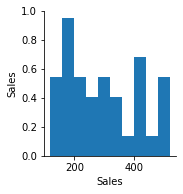

In [6]:
sb.pairplot(sales)

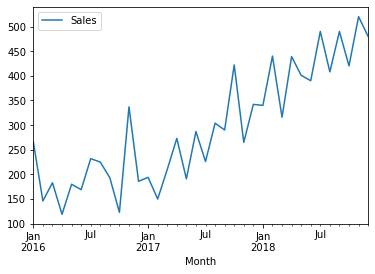

In [5]:
sales.plot() # shows that data is trending(non-stationary) 

### Stationary means Mean,varience and Covarience is constant over periods

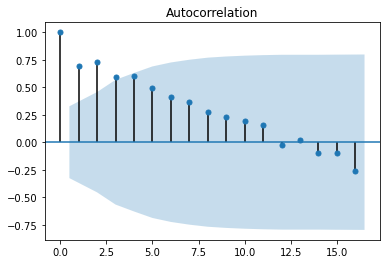

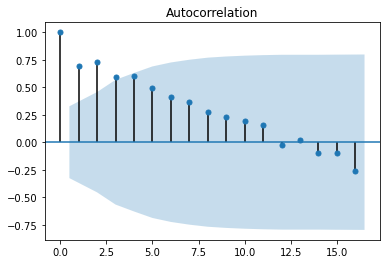

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales) # its gradual decay

## Converting Series to Stationary

In [7]:
sales_diff=sales.diff(periods=1) # By differencing to convert non-stationary to as stationary

In [8]:
sales_diff.head() # there is a NaN value

,Sales
Month,
2016-01-01,NaN
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0


In [9]:
sales_diff=sales_diff[1:] # to remove the NaN value

In [10]:
sales_diff.head(3)

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0


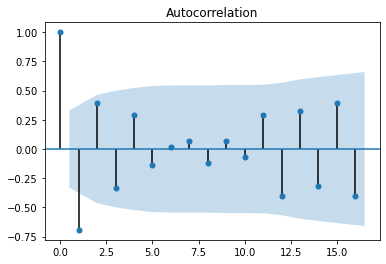

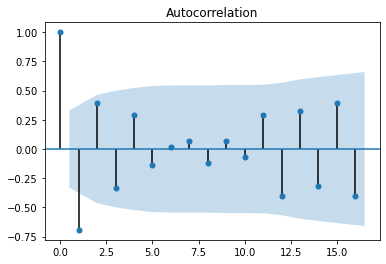

In [11]:
plot_acf(sales_diff)

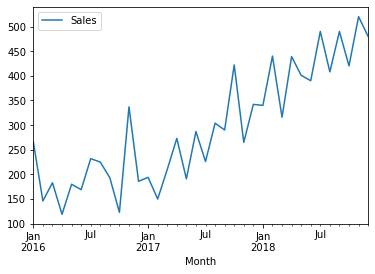

In [12]:
sales.plot() # its trending model

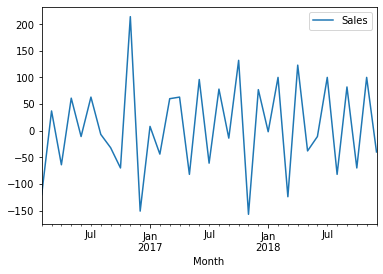

In [13]:
sales_diff.plot()  #its stationary curve

In [14]:
sales.shape

(36, 1)

In [15]:
X=sales.values #training and testing the data manually
train=X[0:27]
test=X[27:]
predictions=[] # to make good plotting created a empty list

## Autoregressive Model

In [16]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar=AR(train)
model_ar_fit=model_ar.fit()

C:\Users\PARVEEZ PASHA\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarn

In [17]:
predictions = model_ar_fit.predict(start=26, end=36)

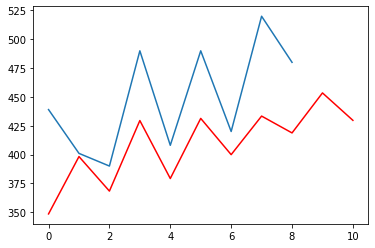

In [18]:
plt.plot(test)
plt.plot(predictions,color='red')

## ARIMA Model 

In [19]:
from statsmodels.tsa.arima_model import ARIMA


In [20]:
# p,d,q- 
# p-periods taken for autoregressive model;
# d- Integrated order, difference
# q- periods in moving average model
model_arima = ARIMA(train,order=(3,1,1)) # we can tune this
model_arima_fit=model_arima.fit()
print(model_arima_fit.aic) # Akaike Information Critera(aic), used in measure of a statistical model,

295.9979353418612


In [21]:
predictions = model_arima_fit.forecast(steps=9)[0] # 9 is 9 feature predictions 0 gives info about forecast
predictions # 0 gives sample forecast, 1 gives std error of forecast, 2 gives confidence interval of the forecast 

array([388.10768153, 361.88638003, 431.54609927, 377.90925848,
       418.71352972, 398.84046379, 442.34753967, 420.19652087,
       447.08625411])

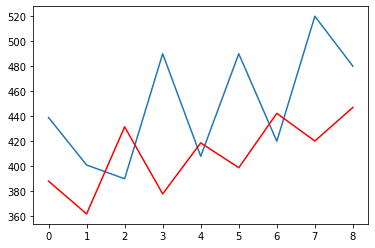

In [22]:
plt.plot(test)
plt.plot(predictions, color='red')

In [23]:
# to obtain p,d,q ranges 
import itertools #gives range of values to obtain set of p,d,q
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))

In [24]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [25]:
for param in pdq: #param is parameter, using for loop we run pdq values continuously
    try:
        model_arima=ARIMA(train,order=param)
        model_arima_fit=model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue # we get warnings becoz not all values are good

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.7244809384947
(0, 0, 2) 315.25060028727887


C:\Users\PARVEEZ PASHA\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:716: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Users\PARVEEZ PASHA\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\PARVEEZ PASHA\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\PARVEEZ PASHA\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:224: RuntimeWarning: invalid value encountered in log
  Z_mat.astype(complex), R_mat, T_mat)
C:\Users\PARVEEZ PASHA\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:224: RuntimeWarning: invalid value encountered in true_divide
  Z_mat.astype(complex), R_mat, T_mat)
C:\Users\PARVEEZ PASHA\anaconda3\lib\site

(0, 0, 3) nan
(0, 0, 4) 310.1669328592633
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.0841530678005
(0, 1, 2) 296.32292269078266
(0, 1, 3) 298.31202117389336


C:\Users\PARVEEZ PASHA\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(0, 1, 4) 300.3393975617985
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.1019469685257
(0, 2, 2) 290.3983417235849


C:\Users\PARVEEZ PASHA\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(0, 2, 3) 292.9858847060129
(1, 0, 0) 316.1668717534279
(1, 0, 1) 313.0487174406702


C:\Users\PARVEEZ PASHA\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:220: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)


(1, 0, 2) 310.9790642275034
(1, 1, 0) 298.8325442271006
(1, 1, 1) 297.12565112585196


C:\Users\PARVEEZ PASHA\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(1, 1, 2) 299.47166670629457


C:\Users\PARVEEZ PASHA\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(1, 1, 3) 301.28511809480204
(1, 2, 0) 306.53077675708374


C:\Users\PARVEEZ PASHA\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:716: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))


(2, 0, 0) 310.9969573612191


C:\Users\PARVEEZ PASHA\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\PARVEEZ PASHA\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\PARVEEZ PASHA\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(2, 0, 1) 342.5246358294303
(2, 1, 0) 300.20895612399573
(2, 1, 1) 297.99999301674006
(2, 1, 2) 298.55054281302245
(2, 1, 3) 302.87208388612163
(2, 2, 0) 306.2975856431866
(3, 0, 0) 312.9838587473828


C:\Users\PARVEEZ PASHA\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\PARVEEZ PASHA\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(3, 0, 1) 336.078521041164


C:\Users\PARVEEZ PASHA\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:714: RuntimeWarning: invalid value encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)
C:\Users\PARVEEZ PASHA\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:716: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))


(3, 1, 0) 294.85435842186024
(3, 1, 1) 295.9979353418612
(3, 1, 2) 292.66862386939545
(3, 1, 3) 294.6588907518689
(3, 2, 0) 299.40758681554314


C:\Users\PARVEEZ PASHA\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:714: RuntimeWarning: divide by zero encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)
C:\Users\PARVEEZ PASHA\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:716: RuntimeWarning: invalid value encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))


(4, 0, 0) 311.0706562039329


C:\Users\PARVEEZ PASHA\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(4, 0, 1) 321.8309391983909
(4, 1, 0) 295.93436313519135
(4, 1, 1) 297.90988170603976
(4, 1, 2) 294.6633610569026
(4, 1, 3) 296.64552472316836
(4, 2, 0) 296.5230072443342
(4, 2, 1) 291.39913447175024
(4, 2, 4) 292.53002909023064


C:\Users\PARVEEZ PASHA\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [26]:
import warnings
warnings.filterwarnings('ignore') # to avoid future warnings
for param in pdq: # param is parameter
    try:
        model_arima=ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
            continue # we use these values to predict ARIMA
    

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.7244809384947
(0, 0, 2) 315.25060028727887
(0, 0, 3) nan
(0, 0, 4) 310.1669328592633
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.0841530678005
(0, 1, 2) 296.32292269078266
(0, 1, 3) 298.31202117389336
(0, 1, 4) 300.3393975617985
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.1019469685257
(0, 2, 2) 290.3983417235849
(0, 2, 3) 292.9858847060129
(1, 0, 0) 316.1668717534279
(1, 0, 1) 313.0487174406702
(1, 0, 2) 310.9790642275034
(1, 1, 0) 298.8325442271006
(1, 1, 1) 297.12565112585196
(1, 1, 2) 299.47166670629457
(1, 1, 3) 301.28511809480204
(1, 2, 0) 306.53077675708374
(2, 0, 0) 310.9969573612191
(2, 0, 1) 342.5246358294303
(2, 1, 0) 300.20895612399573
(2, 1, 1) 297.99999301674006
(2, 1, 2) 298.55054281302245
(2, 1, 3) 302.87208388612163
(2, 2, 0) 306.2975856431866
(3, 0, 0) 312.9838587473828
(3, 0, 1) 336.078521041164
(3, 1, 0) 294.85435842186024
(3, 1, 1) 295.9979353418612
(3, 1, 2) 292.66862386939545
(3, 1, 3) 294.6588907518689
(3, 2, 0) 299.4075868

In [27]:
mean_squared_error(test,predictions)# difference btwn actual and predicted


4264.29093886636

In [28]:
test

array([[439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]], dtype=int64)

In [29]:
predictions

array([388.10768153, 361.88638003, 431.54609927, 377.90925848,
       418.71352972, 398.84046379, 442.34753967, 420.19652087,
       447.08625411])